In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Average Imputation | MICE

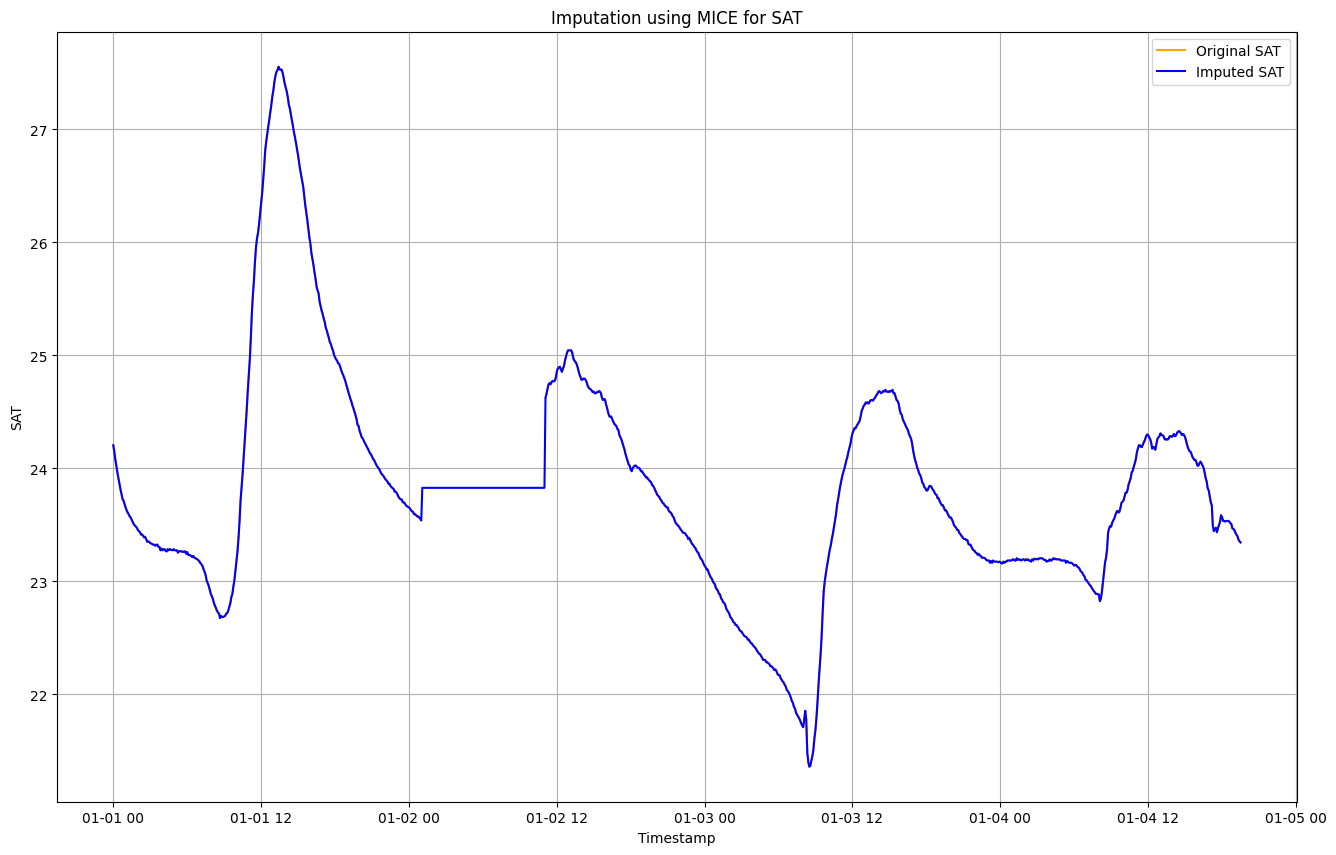

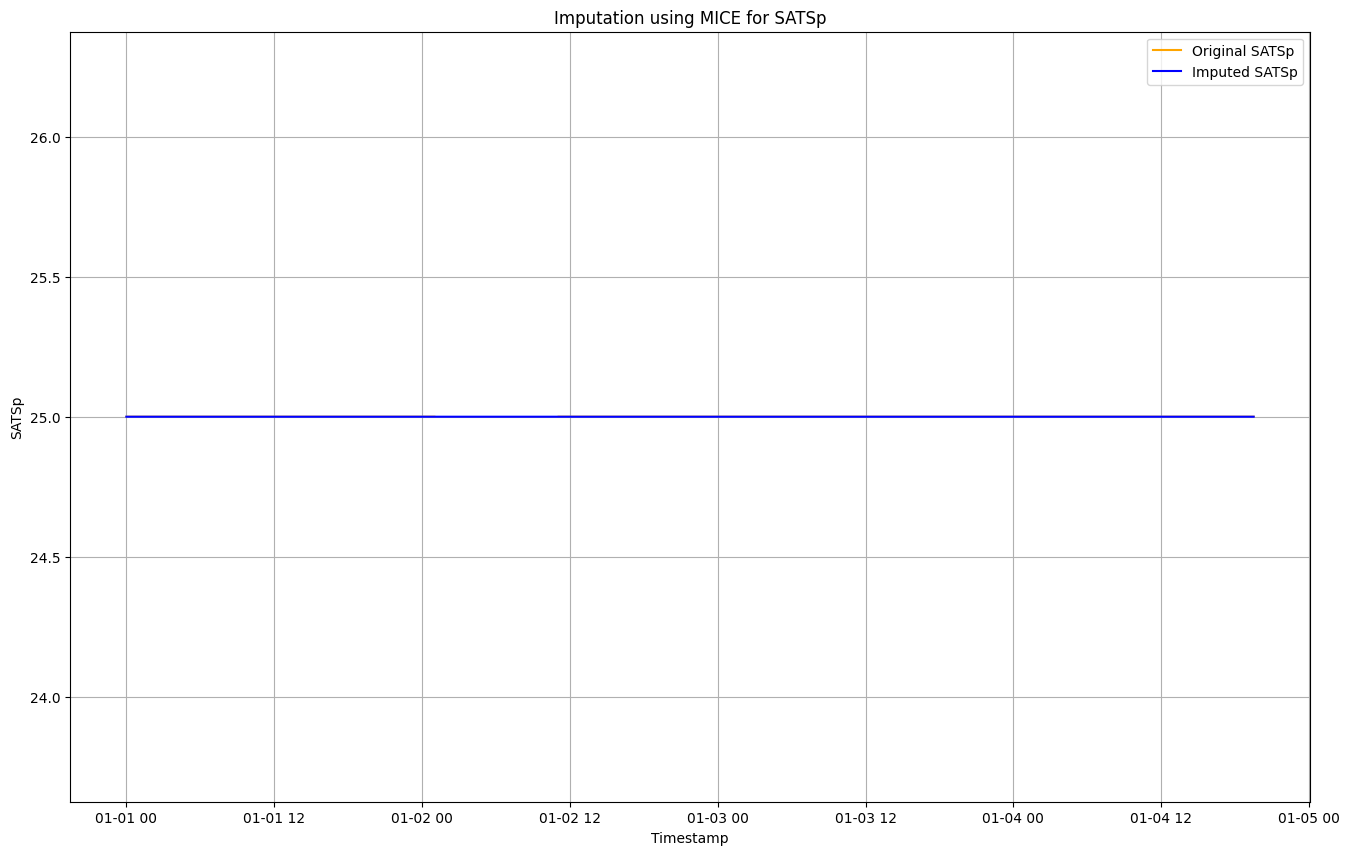

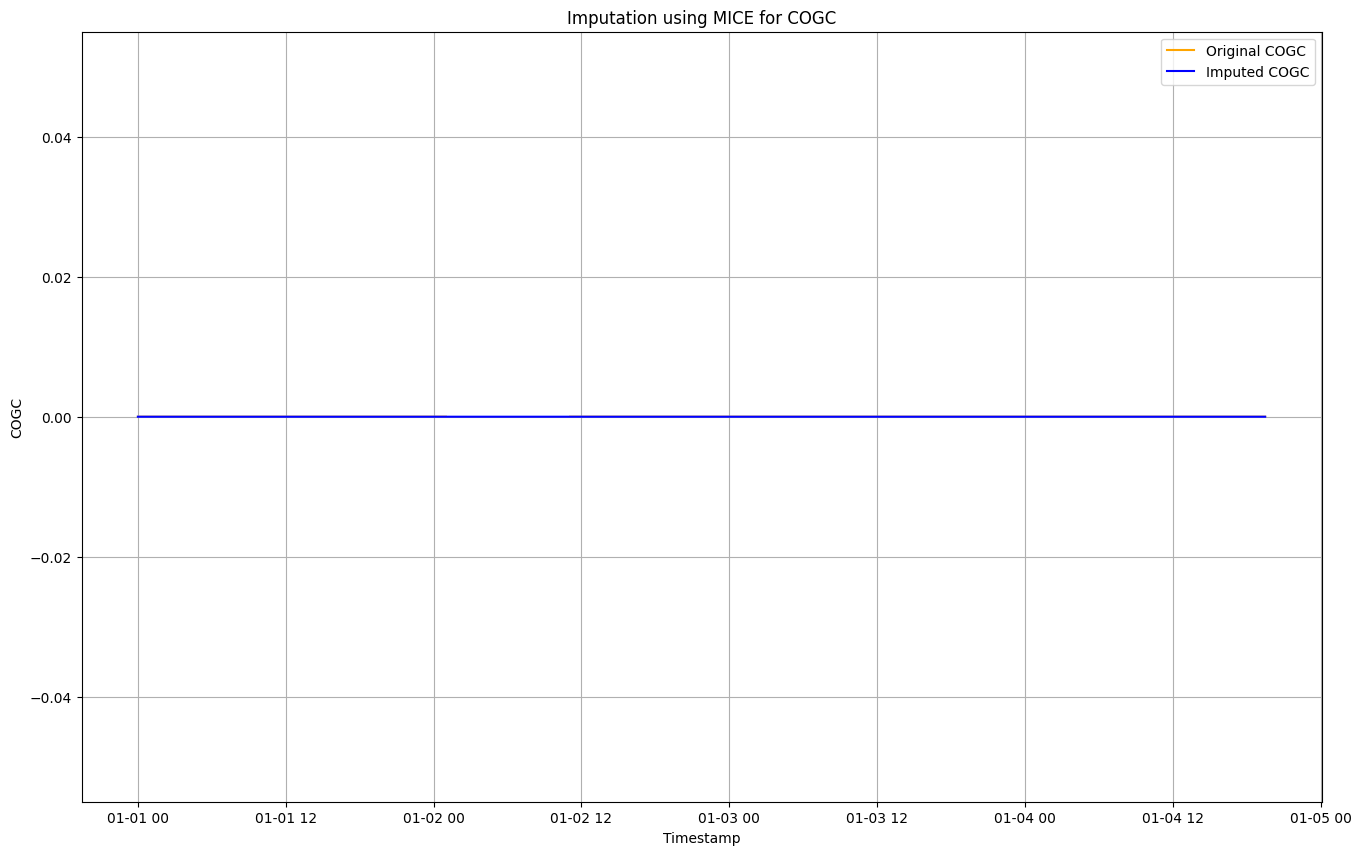

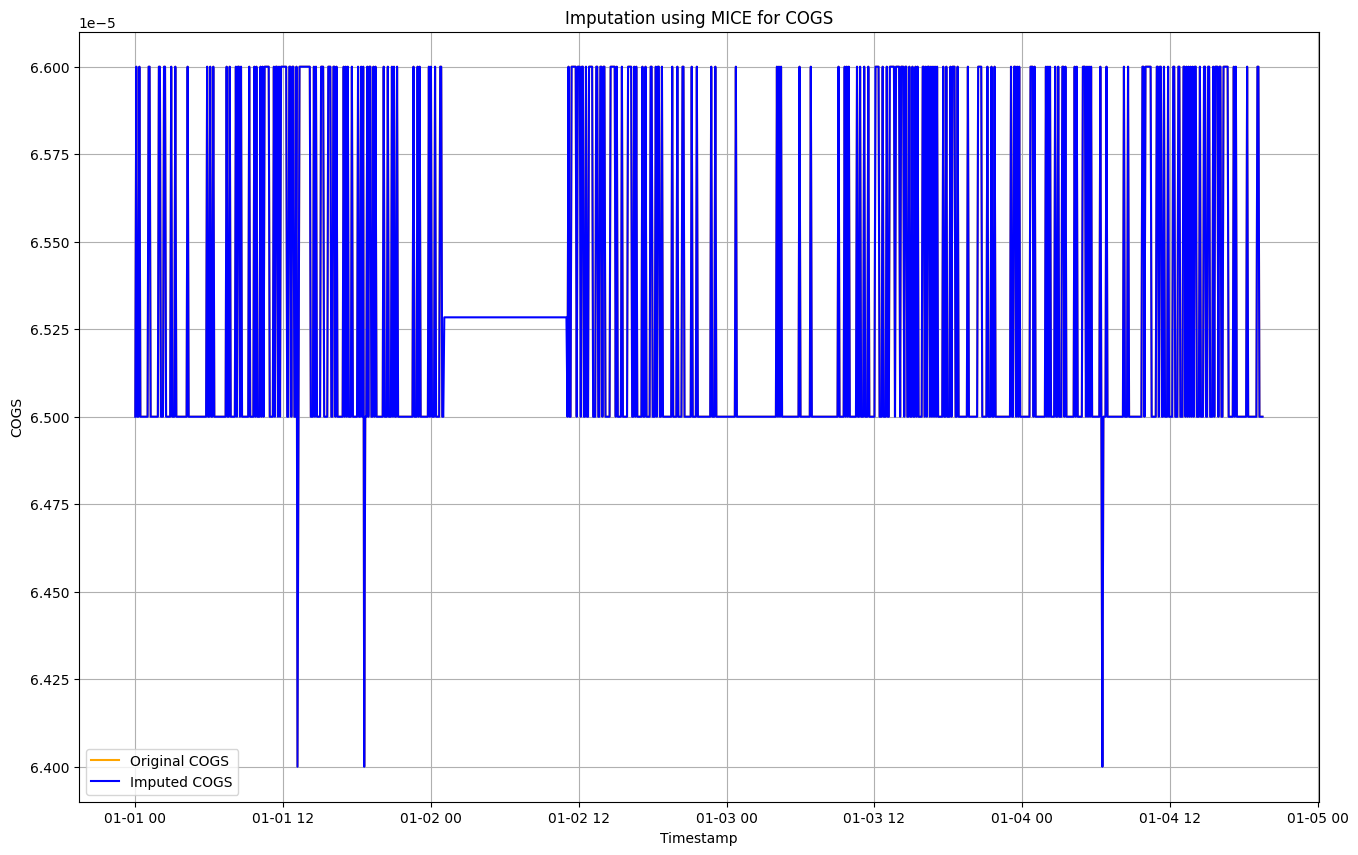

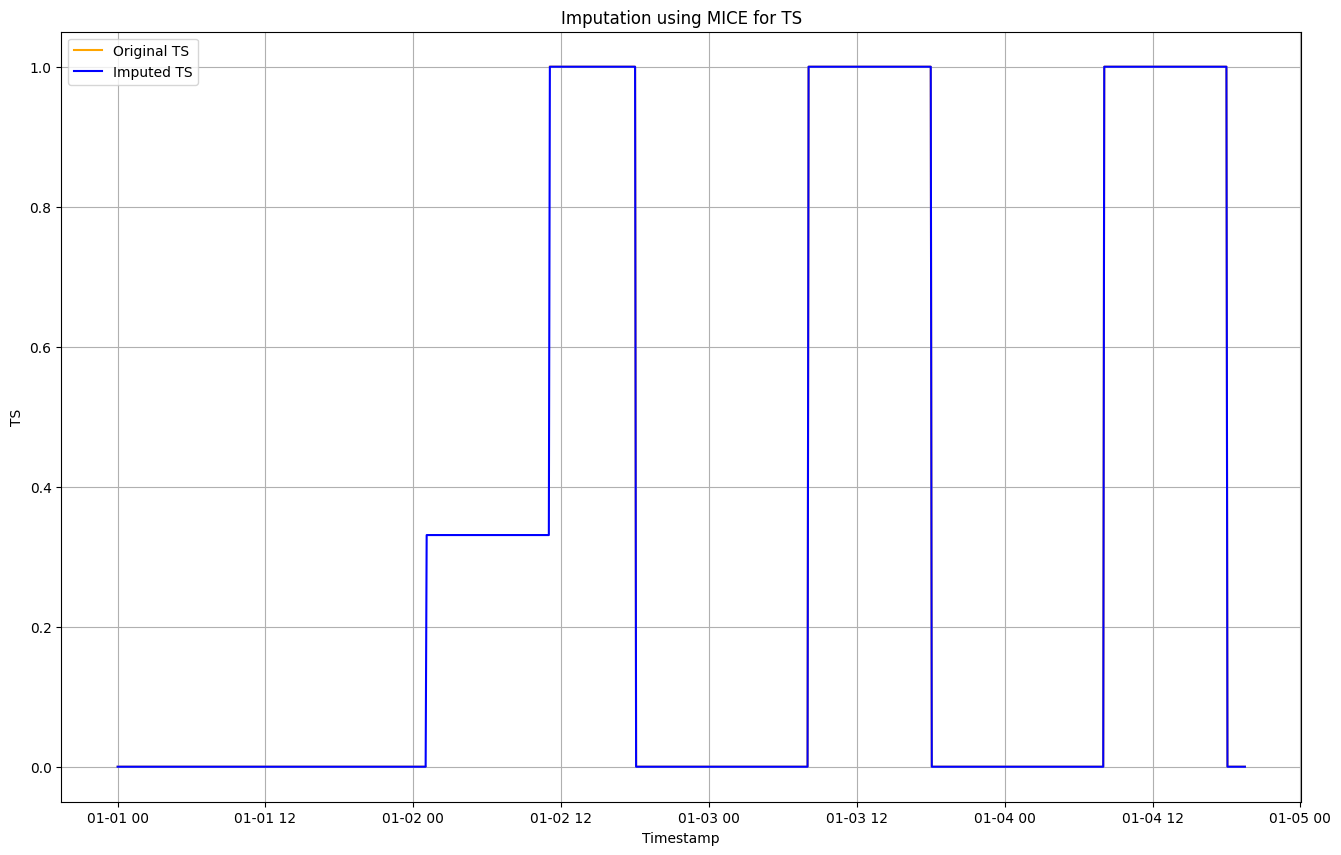

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset
file_path = "/content/drive/MyDrive/Enova_DA/DMC_F1B41k.xlsx"
df = pd.read_excel(file_path)

# Ensure the Timestamp column is in datetime format and sort the dataframe
df['Tst'] = pd.to_datetime(df['Tst'], errors='coerce')
df = df.sort_values(by='Tst')

# Handle the percentage columns by converting to string, removing the '%' sign, and converting to float
df['COGC'] = df['COGC'].astype(str).str.rstrip('%').astype(float) / 100
df['COGS'] = df['COGS'].astype(str).str.rstrip('%').astype(float) / 100
df['TS'] = df['TS'].astype(float)

# Define the columns to impute missing values
columns_to_impute = ['SAT', 'SATSp', 'COGC', 'COGS', 'TS']

# Initialize the MICE imputer
imputer = IterativeImputer(random_state=0)

# Impute missing values
df_imputed = df.copy()
df_imputed[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Plotting the original and imputed data separately for each variable
for column in columns_to_impute:
    plt.figure(figsize=(16, 10))

    # Plot original data with gaps for NaNs
    plt.plot(df['Tst'], df[column], label='Original ' + column, color='orange', zorder=1)

    # Plot imputed data
    plt.plot(df['Tst'], df_imputed[column], label='Imputed ' + column, color='blue', zorder=2)

    plt.xlabel('Timestamp')
    plt.ylabel(column)
    plt.title(f'Imputation using MICE for {column}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Save the imputed DataFrame to a new Excel file
output_path = "/content/drive/MyDrive/Enova_DA/Imputed_Data.xlsx"
df_imputed.to_excel(output_path, index=False)



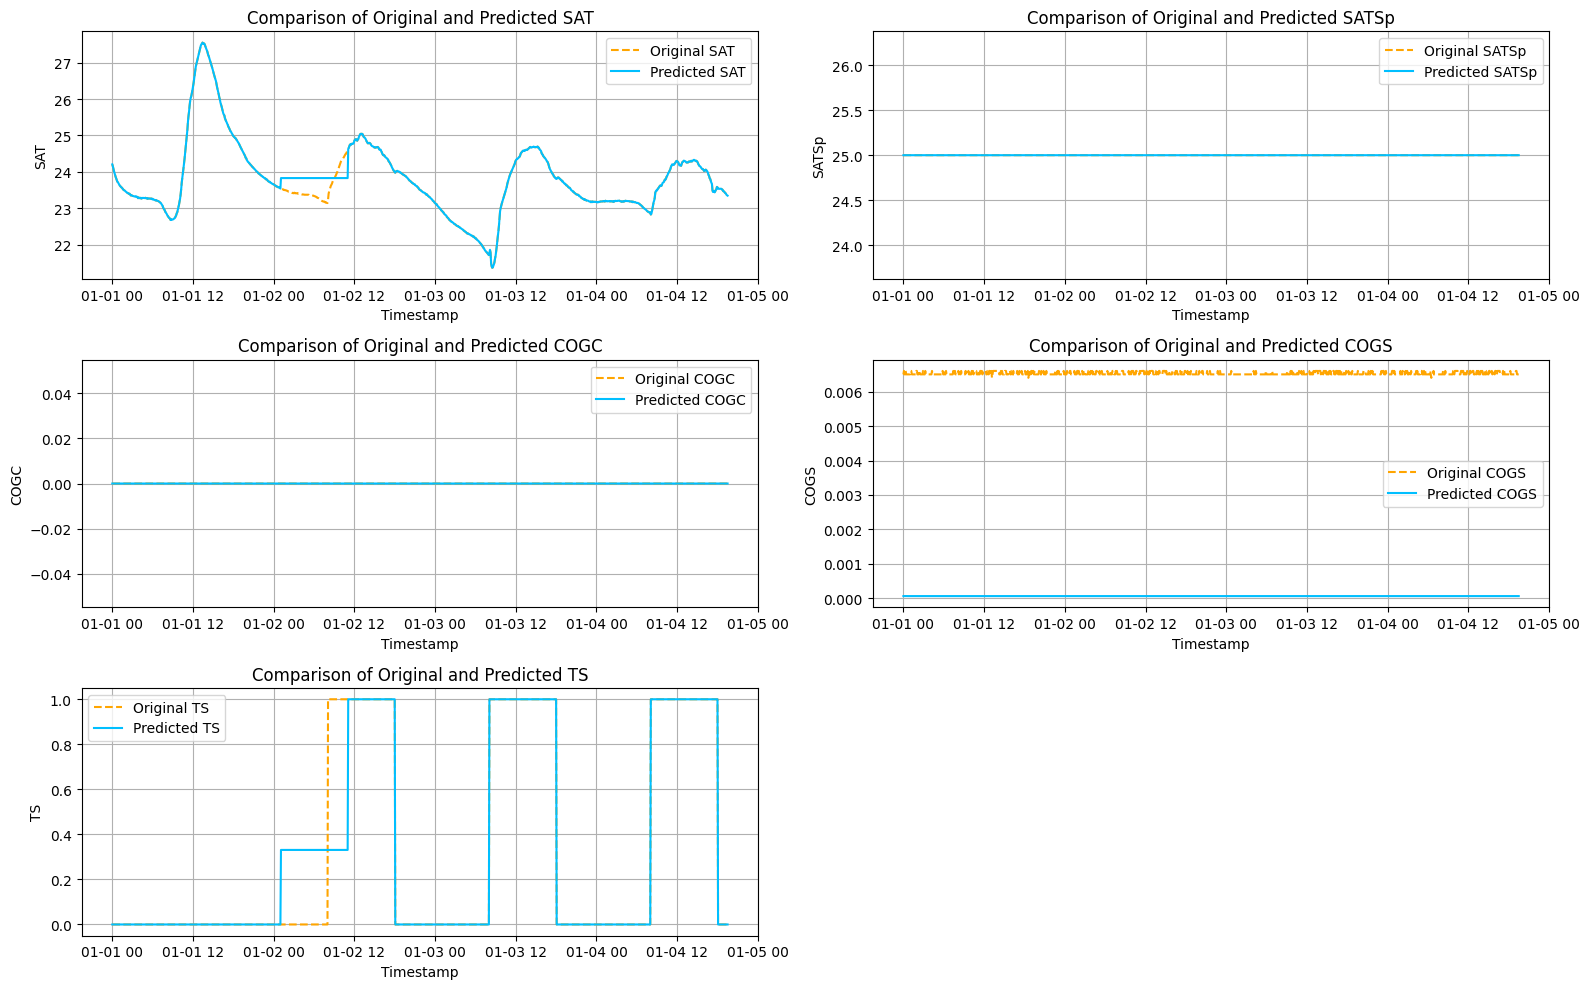

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original and predicted datasets
file_path_original = "/content/drive/MyDrive/Enova_DA/DMC_F1B4-Org.xlsx"
file_path_predicted = "/content/drive/MyDrive/Enova_DA/Imputed_Data.xlsx"

# Read the datasets
df_original = pd.read_excel(file_path_original)
df_predicted = pd.read_excel(file_path_predicted)

# Plotting each column in separate charts
plt.figure(figsize=(16, 10))

# SAT
plt.subplot(3, 2, 1)
plt.plot(df_original['Tst'], df_original['SAT'], label='Original SAT', color='orange', linestyle='--')
plt.plot(df_predicted['Tst'], df_predicted['SAT'], label='Predicted SAT', color='deepskyblue')  # Changed color
plt.xlabel('Timestamp')
plt.ylabel('SAT')
plt.title('Comparison of Original and Predicted SAT')
plt.legend()
plt.grid(True)

# SATSp
plt.subplot(3, 2, 2)
plt.plot(df_original['Tst'], df_original['SATSp'], label='Original SATSp', color='orange', linestyle='--')
plt.plot(df_predicted['Tst'], df_predicted['SATSp'], label='Predicted SATSp', color='deepskyblue')  # Changed color
plt.xlabel('Timestamp')
plt.ylabel('SATSp')
plt.title('Comparison of Original and Predicted SATSp')
plt.legend()
plt.grid(True)

# COGC
plt.subplot(3, 2, 3)
plt.plot(df_original['Tst'], df_original['COGC'], label='Original COGC', color='orange', linestyle='--')
plt.plot(df_predicted['Tst'], df_predicted['COGC'], label='Predicted COGC', color='deepskyblue')  # Changed color
plt.xlabel('Timestamp')
plt.ylabel('COGC')
plt.title('Comparison of Original and Predicted COGC')
plt.legend()
plt.grid(True)

# COGS
plt.subplot(3, 2, 4)
plt.plot(df_original['Tst'], df_original['COGS'], label='Original COGS', color='orange', linestyle='--')
plt.plot(df_predicted['Tst'], df_predicted['COGS'], label='Predicted COGS', color='deepskyblue')  # Changed color
plt.xlabel('Timestamp')
plt.ylabel('COGS')
plt.title('Comparison of Original and Predicted COGS')
plt.legend()
plt.grid(True)

# TS
plt.subplot(3, 2, 5)
plt.plot(df_original['Tst'], df_original['TS'], label='Original TS', color='orange', linestyle='--')
plt.plot(df_predicted['Tst'], df_predicted['TS'], label='Predicted TS', color='deepskyblue')  # Changed color
plt.xlabel('Timestamp')
plt.ylabel('TS')
plt.title('Comparison of Original and Predicted TS')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
pip install pomegranate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.4/92.4 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 8.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached

In [20]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
file_path = "/content/drive/MyDrive/Enova_DA/DMC_F1B41k.xlsx"
df = pd.read_excel(file_path)

# Ensure the Timestamp column is in datetime format and sort the dataframe
df['Tst'] = pd.to_datetime(df['Tst'], errors='coerce')
df = df.sort_values(by='Tst')

# Handle the percentage columns by converting to string, removing the '%' sign, and converting to float
df['COGC'] = df['COGC'].astype(str).str.rstrip('%').astype(float) / 100
df['COGS'] = df['COGS'].astype(str).str.rstrip('%').astype(float) / 100
df['TS'] = df['TS'].astype(float)

# Target variable
target_variable = 'SAT'

# Initialize the MICE imputer
imputer = IterativeImputer(random_state=0)

# Impute missing values for target variable 'SAT' using PNN
df_imputed = df.copy()
missing_indices = df_imputed[target_variable].isnull()
if missing_indices.any():
    # Split data into training and test sets
    X_train = df_imputed.loc[~missing_indices].drop(columns=['Tst', target_variable])
    y_train = df_imputed.loc[~missing_indices, target_variable]
    X_missing = df_imputed.loc[missing_indices].drop(columns=['Tst', target_variable])

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_missing_scaled = scaler.transform(X_missing)

    # Define neural network architecture
    model = Sequential([
        Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    # Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train model
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

    # Predict missing values
    imputed_values = model.predict(X_missing_scaled).flatten()
    df_imputed.loc[missing_indices, target_variable] = imputed_values

# Perform MICE imputation for remaining missing values
df_imputed.iloc[:, 1:] = imputer.fit_transform(df_imputed.iloc[:, 1:])

# Save the imputed DataFrame to a new Excel file
output_path = "/content/drive/MyDrive/Enova_DA/Imputed_PNN.xlsx"
df_imputed.to_excel(output_path, index=False)


4/4 [==============================] - 0s 3ms/step


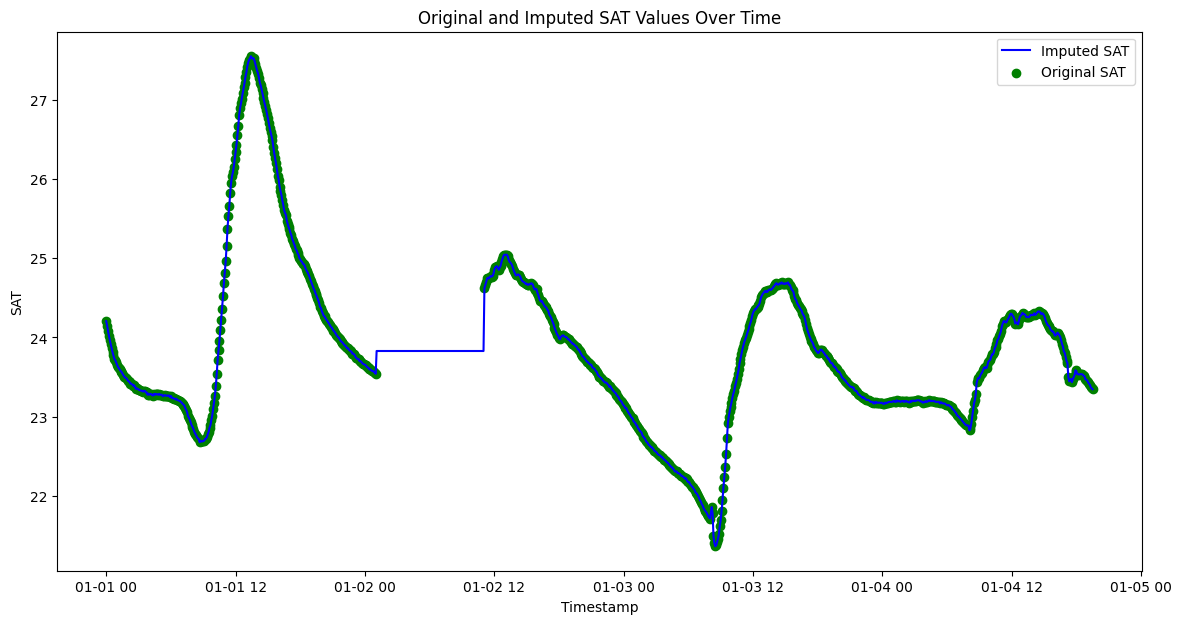

In [19]:
import matplotlib.pyplot as plt

# Create a column to distinguish between original and imputed values
df_imputed['Data_Type'] = 'Original'
df_imputed.loc[missing_indices, 'Data_Type'] = 'Imputed'

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df_imputed['Tst'], df_imputed['SAT'], label='Imputed SAT', color='blue')
plt.scatter(df_imputed.loc[df_imputed['Data_Type'] == 'Original', 'Tst'],
            df_imputed.loc[df_imputed['Data_Type'] == 'Original', 'SAT'],
            color='green', label='Original SAT')

plt.xlabel('Timestamp')
plt.ylabel('SAT')
plt.title('Original and Imputed SAT Values Over Time')
plt.legend()
plt.show()


PNN imputation in MICE and Org data comparison

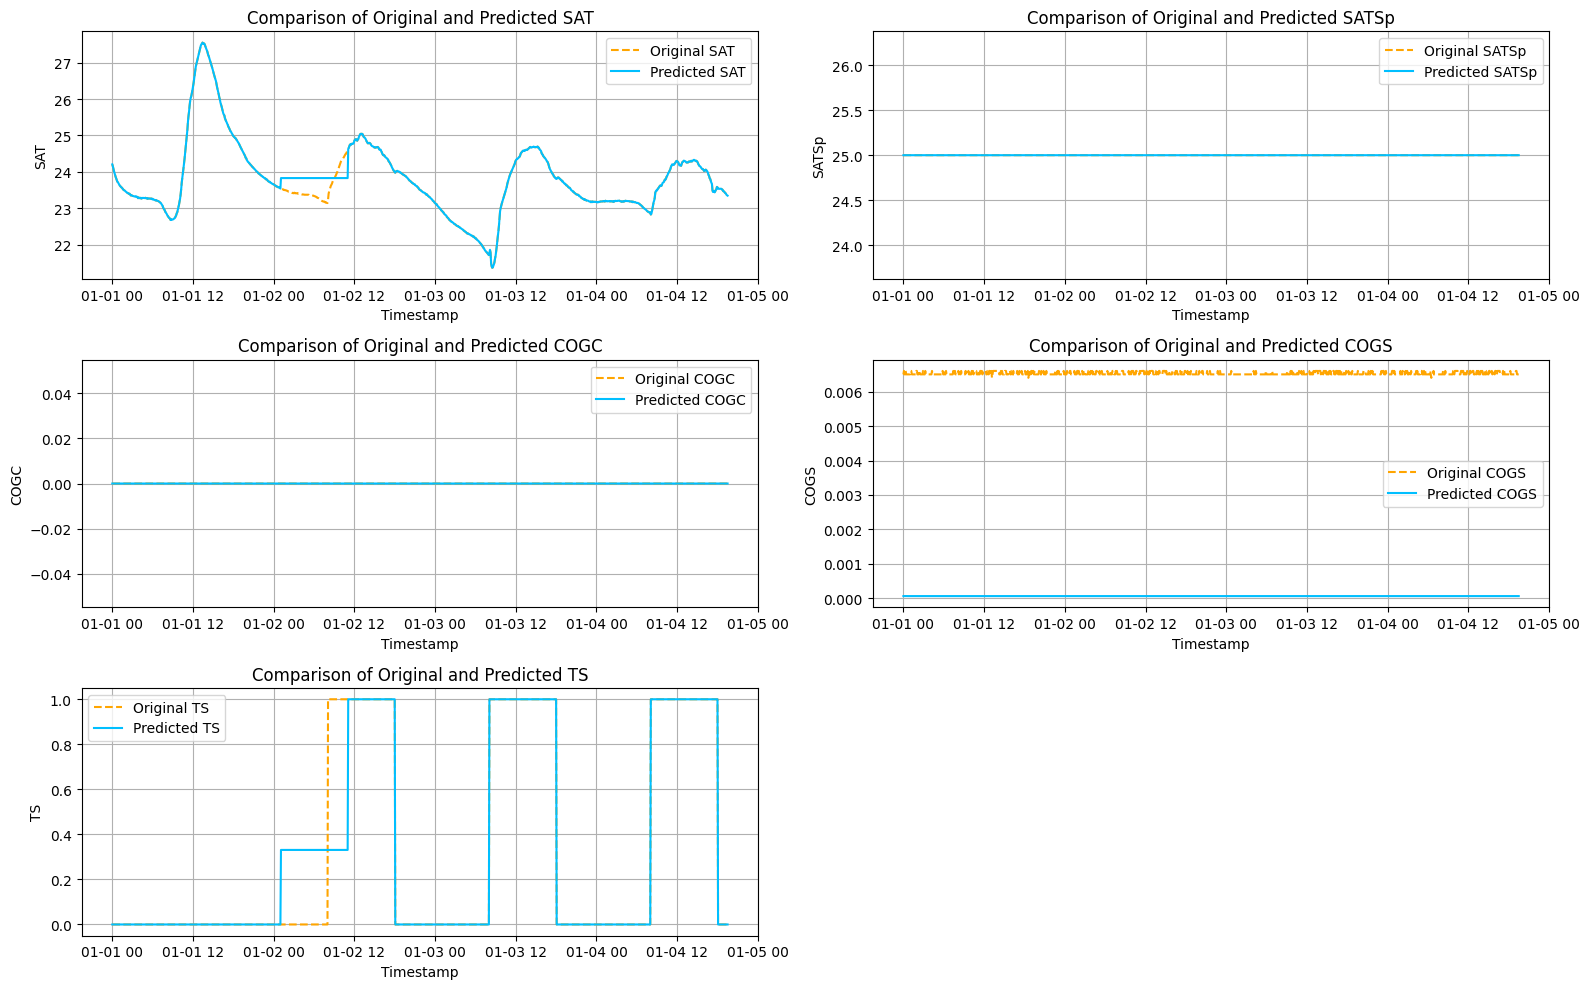

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original and predicted datasets
file_path_original = "/content/drive/MyDrive/Enova_DA/DMC_F1B4-Org.xlsx"
file_path_predicted = "/content/drive/MyDrive/Enova_DA/Imputed_PNN.xlsx"

# Read the datasets
df_original = pd.read_excel(file_path_original)
df_predicted = pd.read_excel(file_path_predicted)

# Plotting each column in separate charts
plt.figure(figsize=(16, 10))

# SAT
plt.subplot(3, 2, 1)
plt.plot(df_original['Tst'], df_original['SAT'], label='Original SAT', color='orange', linestyle='--')
plt.plot(df_predicted['Tst'], df_predicted['SAT'], label='Predicted SAT', color='deepskyblue')  # Changed color
plt.xlabel('Timestamp')
plt.ylabel('SAT')
plt.title('Comparison of Original and Predicted SAT')
plt.legend()
plt.grid(True)

# SATSp
plt.subplot(3, 2, 2)
plt.plot(df_original['Tst'], df_original['SATSp'], label='Original SATSp', color='orange', linestyle='--')
plt.plot(df_predicted['Tst'], df_predicted['SATSp'], label='Predicted SATSp', color='deepskyblue')  # Changed color
plt.xlabel('Timestamp')
plt.ylabel('SATSp')
plt.title('Comparison of Original and Predicted SATSp')
plt.legend()
plt.grid(True)

# COGC
plt.subplot(3, 2, 3)
plt.plot(df_original['Tst'], df_original['COGC'], label='Original COGC', color='orange', linestyle='--')
plt.plot(df_predicted['Tst'], df_predicted['COGC'], label='Predicted COGC', color='deepskyblue')  # Changed color
plt.xlabel('Timestamp')
plt.ylabel('COGC')
plt.title('Comparison of Original and Predicted COGC')
plt.legend()
plt.grid(True)

# COGS
plt.subplot(3, 2, 4)
plt.plot(df_original['Tst'], df_original['COGS'], label='Original COGS', color='orange', linestyle='--')
plt.plot(df_predicted['Tst'], df_predicted['COGS'], label='Predicted COGS', color='deepskyblue')  # Changed color
plt.xlabel('Timestamp')
plt.ylabel('COGS')
plt.title('Comparison of Original and Predicted COGS')
plt.legend()
plt.grid(True)

# TS
plt.subplot(3, 2, 5)
plt.plot(df_original['Tst'], df_original['TS'], label='Original TS', color='orange', linestyle='--')
plt.plot(df_predicted['Tst'], df_predicted['TS'], label='Predicted TS', color='deepskyblue')  # Changed color
plt.xlabel('Timestamp')
plt.ylabel('TS')
plt.title('Comparison of Original and Predicted TS')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Decision Tree with MICE**

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


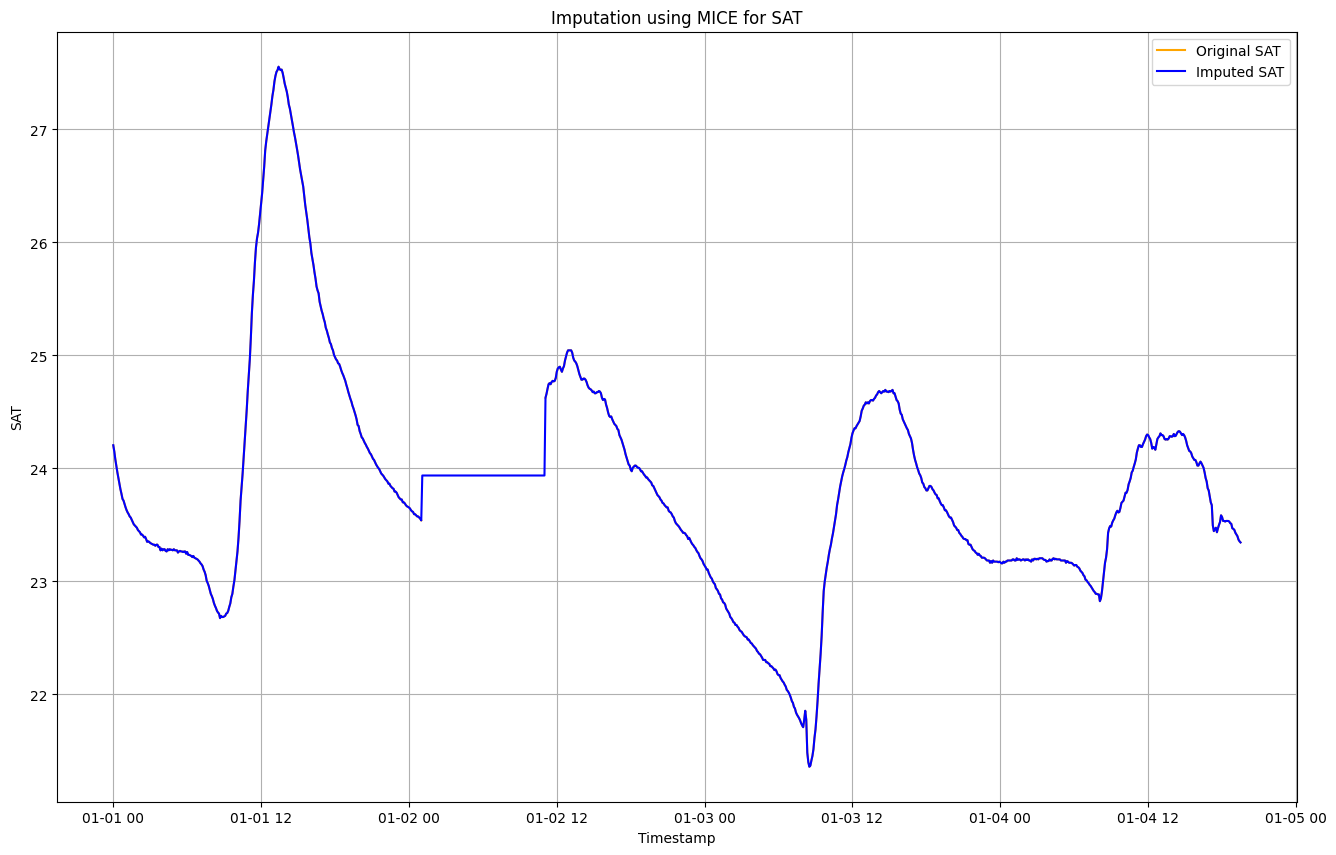

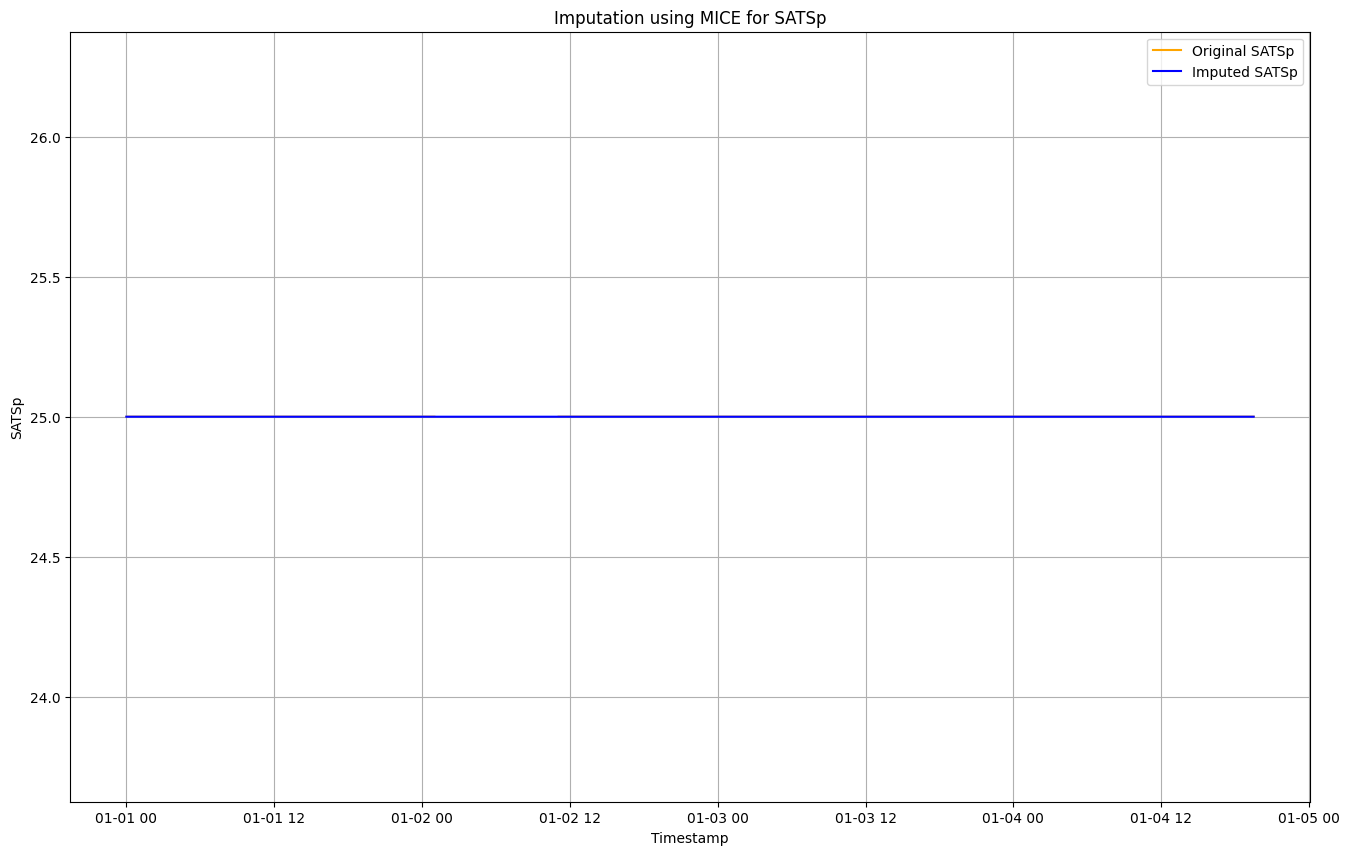

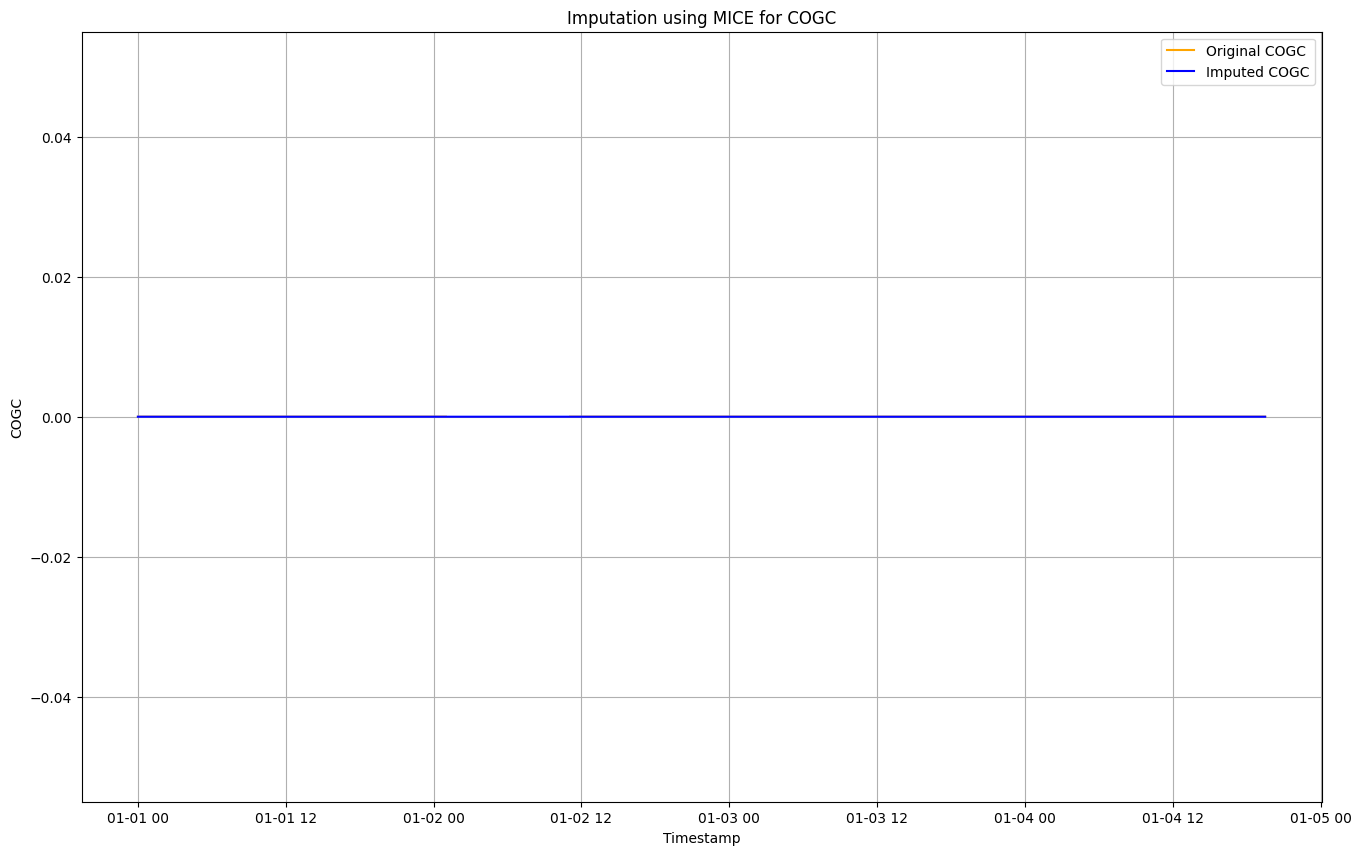

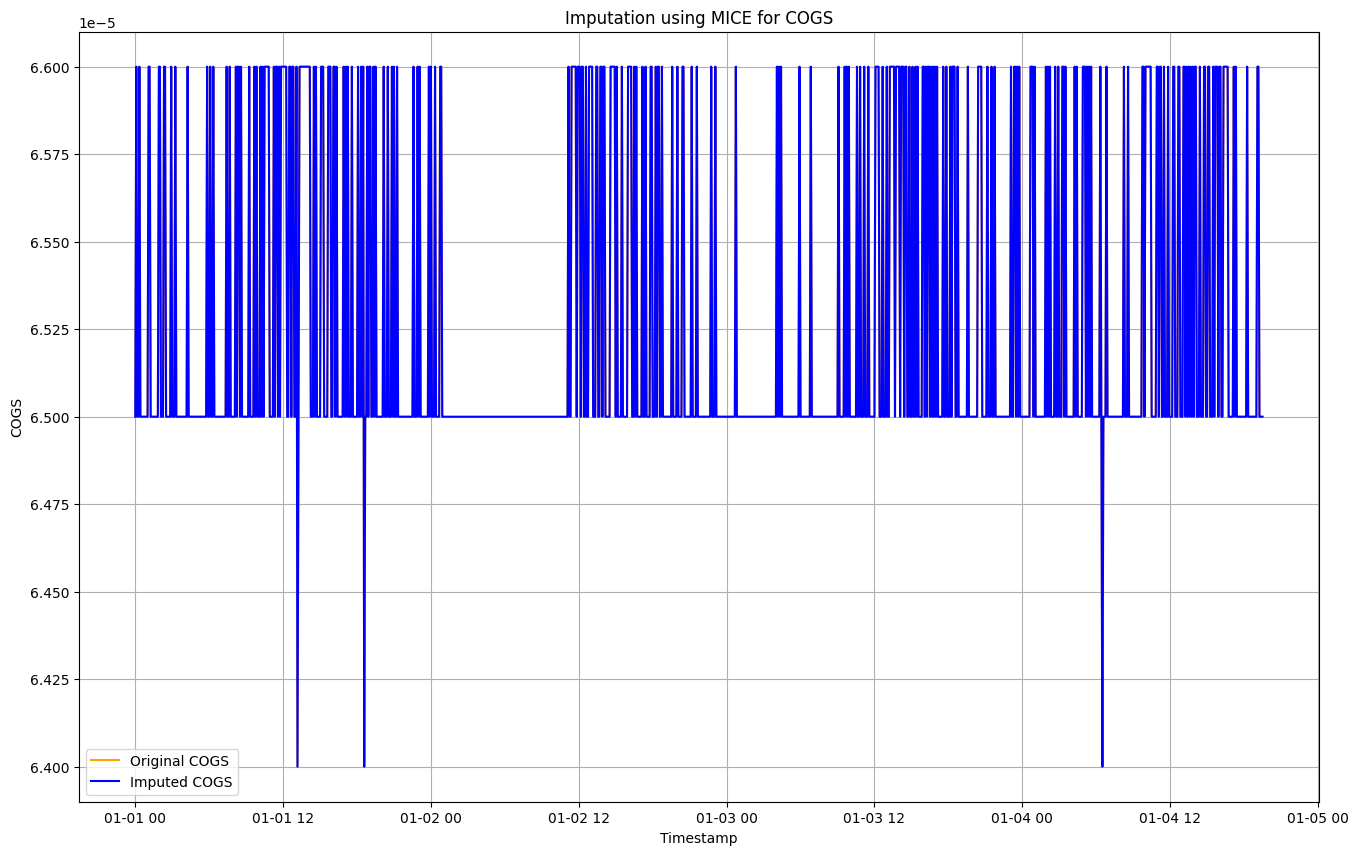

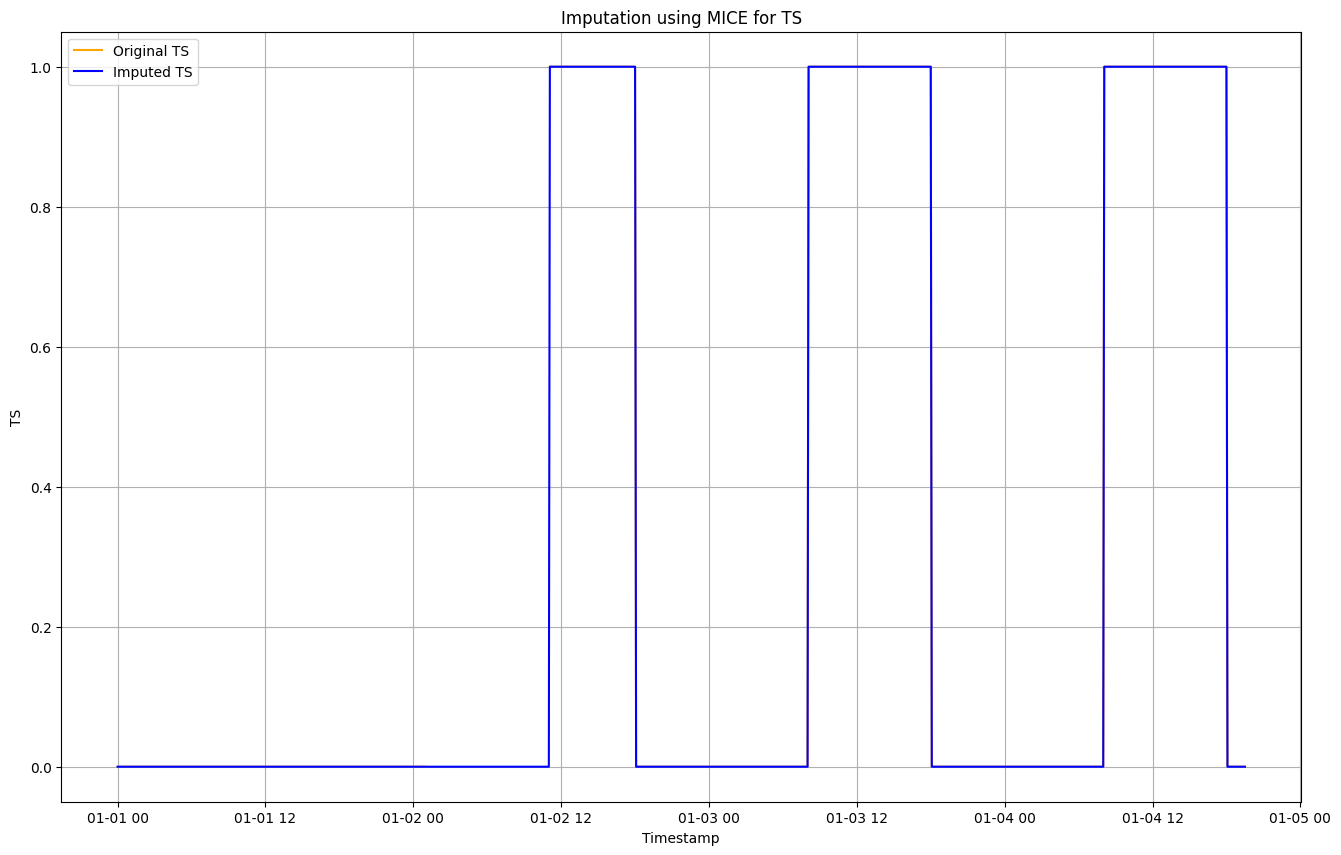

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

# Load the dataset
file_path = "/content/drive/MyDrive/Enova_DA/DMC_F1B41k.xlsx"
df = pd.read_excel(file_path)

# Ensure the Timestamp column is in datetime format and sort the dataframe
df['Tst'] = pd.to_datetime(df['Tst'], errors='coerce')
df = df.sort_values(by='Tst')

# Handle the percentage columns by converting to string, removing the '%' sign, and converting to float
df['COGC'] = df['COGC'].astype(str).str.rstrip('%').astype(float) / 100
df['COGS'] = df['COGS'].astype(str).str.rstrip('%').astype(float) / 100
df['TS'] = df['TS'].astype(float)

# Define the columns to impute missing values
columns_to_impute = ['SAT', 'SATSp', 'COGC', 'COGS', 'TS']

# Initialize the MICE imputer with DecisionTreeRegressor
imputer = IterativeImputer(estimator=DecisionTreeRegressor(), random_state=0)

# Impute missing values
df_imputed = df.copy()
df_imputed[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Plotting the original and imputed data separately for each variable
for column in columns_to_impute:
    plt.figure(figsize=(16, 10))

    # Plot original data with gaps for NaNs
    plt.plot(df['Tst'], df[column], label='Original ' + column, color='orange', zorder=1)


    # Plot imputed data
    plt.plot(df['Tst'], df_imputed[column], label='Imputed ' + column, color='blue', zorder=2)

    plt.xlabel('Timestamp')
    plt.ylabel(column)
    plt.title(f'Imputation using MICE for {column}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Save the imputed DataFrame to a new Excel file
output_path = "/content/drive/MyDrive/Enova_DA/Imputed_DT.xlsx"
df_imputed.to_excel(output_path, index=False)


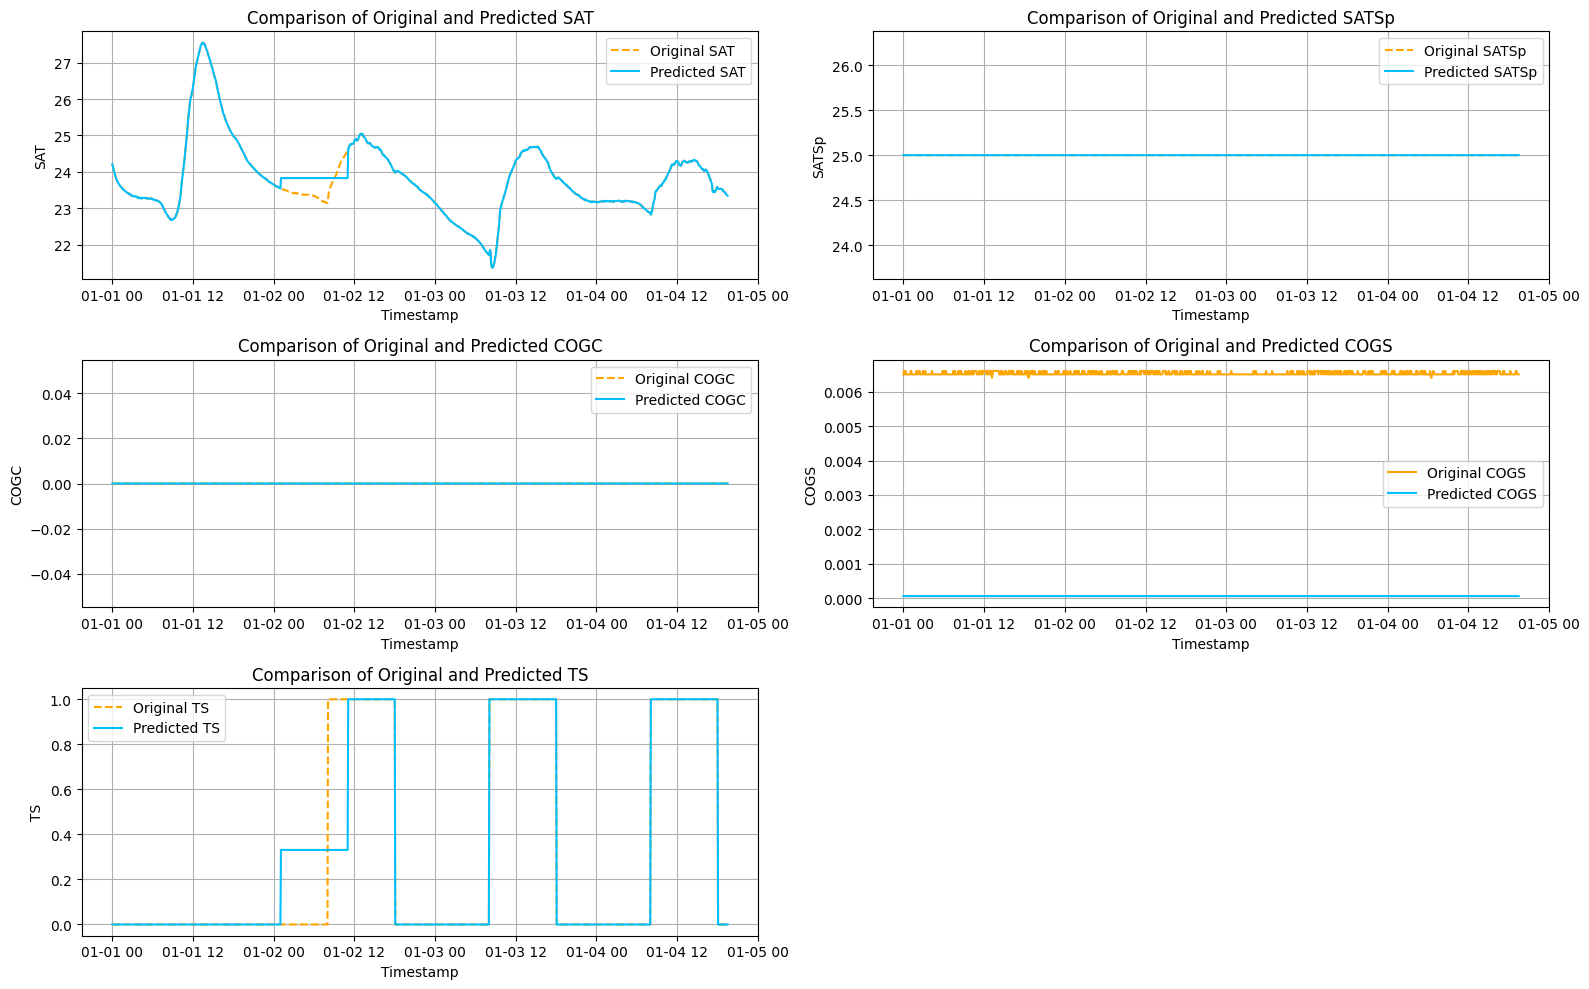

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original and predicted datasets
file_path_original = "/content/drive/MyDrive/Enova_DA/DMC_F1B4-Org.xlsx"
file_path_predicted = "/content/drive/MyDrive/Enova_DA/Imputed_Data.xlsx"

# Read the datasets
df_original = pd.read_excel(file_path_original)
df_predicted = pd.read_excel(file_path_predicted)

# Plotting each column in separate charts
plt.figure(figsize=(16, 10))

# SAT
plt.subplot(3, 2, 1)
plt.plot(df_original['Tst'], df_original['SAT'], label='Original SAT', color='orange', linestyle='--')
plt.plot(df_predicted['Tst'], df_predicted['SAT'], label='Predicted SAT', color='deepskyblue')  # Changed color
plt.xlabel('Timestamp')
plt.ylabel('SAT')
plt.title('Comparison of Original and Predicted SAT')
plt.legend()
plt.grid(True)

# SATSp
plt.subplot(3, 2, 2)
plt.plot(df_original['Tst'], df_original['SATSp'], label='Original SATSp', color='orange', linestyle='--')
plt.plot(df_predicted['Tst'], df_predicted['SATSp'], label='Predicted SATSp', color='deepskyblue')  # Changed color
plt.xlabel('Timestamp')
plt.ylabel('SATSp')
plt.title('Comparison of Original and Predicted SATSp')
plt.legend()
plt.grid(True)

# COGC
plt.subplot(3, 2, 3)
plt.plot(df_original['Tst'], df_original['COGC'], label='Original COGC', color='orange', linestyle='--')
plt.plot(df_predicted['Tst'], df_predicted['COGC'], label='Predicted COGC', color='deepskyblue')  # Changed color
plt.xlabel('Timestamp')
plt.ylabel('COGC')
plt.title('Comparison of Original and Predicted COGC')
plt.legend()
plt.grid(True)

# COGS
plt.subplot(3, 2, 4)
plt.plot(df_original['Tst'], df_original['COGS'], label='Original COGS', color='orange')
plt.plot(df_predicted['Tst'], df_predicted['COGS'], label='Predicted COGS', color='deepskyblue')  # Changed color
plt.xlabel('Timestamp')
plt.ylabel('COGS')
plt.title('Comparison of Original and Predicted COGS')
plt.legend()
plt.grid(True)

# TS
plt.subplot(3, 2, 5)
plt.plot(df_original['Tst'], df_original['TS'], label='Original TS', color='orange', linestyle='--')
plt.plot(df_predicted['Tst'], df_predicted['TS'], label='Predicted TS', color='deepskyblue')  # Changed color
plt.xlabel('Timestamp')
plt.ylabel('TS')
plt.title('Comparison of Original and Predicted TS')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
